# Lecture 14 / Lab 4 - Z Scores; Space-Time Cube Slicing

In [3]:
import pandas as pd
import seaborn as sns




















#### Announcements:
* Quiz 4 this weekend!
* Data Ethics 1 due Sunday!
* 

#### Goals
* Be able to calculate and interpret $z$-scores
* Get started on Lab 4!

## Z-Scores and Normalization

(a brief topic I ran out of time for on Tuesday)


In the NHANES dataset, heights and other length measurements are given in centimeters. I don't have intuition for what's a normal height in centimeters - if you're 160cm tall, are you short? tall? average? One thing I could do is convert to feet and inches which I do know. But sometimes you don't have any units that are intuitive.

In [4]:
data_url = "https://fw.cs.wwu.edu/~wehrwes/courses/data311_21f/data/NHANES/NHANES.csv"
cols_renamed = {"SEQN": "SEQN",
                "RIAGENDR": "Gender", # 1 = M, 2 = F
                "RIDAGEYR": "Age", # years
                "BMXWT": "Weight", # kg
                "BMXHT": "Height", # cm
                "BMXLEG": "Leg", # cm
                "BMXARML": "Arm", # cm
                "BMXARMC": "Arm Cir", # cm
                "BMXWAIST": "Waist Cir"} # cm

df = pd.read_csv(data_url)
df = df.rename(cols_renamed, axis='columns')
df = df.drop("SEQN", axis='columns')
df = df[df["Age"] >= 21]

In [5]:
ht_col = df["Height"]
ht_col

2       158.3
5       150.2
6       151.1
8       170.6
10      178.6
        ...  
8697    180.1
8699    156.5
8700    164.9
8701    162.6
8703    175.8
Name: Height, Length: 5193, dtype: float64

To compute a $z$-score:
1. Subtract the mean
2. Divide by the standard deviation.

In [6]:
df["Height-z"] = (ht_col - ht_col.mean()) / ht_col.std()
df["Height-z"]

2      -0.787712
5      -1.589290
6      -1.500226
8       0.429499
10      1.221180
          ...   
8697    1.369621
8699   -0.965840
8700   -0.134575
8701   -0.362183
8703    0.944092
Name: Height-z, Length: 5193, dtype: float64

<AxesSubplot:xlabel='Height-z', ylabel='Count'>

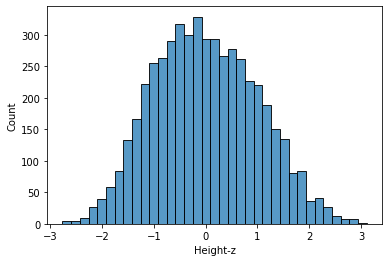

In [7]:
sns.histplot(x="Height-z", data=df)

<AxesSubplot:ylabel='Frequency'>

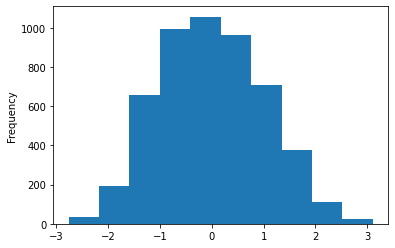

In [8]:
df["Height-z"].plot.hist()

Now instead of the raw data value, you have an interpretable measure of how close each point is to the mean. If you have an approximately-Gaussian distribution, you also have a good idea of how unusual that point is!